# CSE-221710305019-siddharth

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df=pd.read_csv("abalone.csv",names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.describe(include='O')

,Sex
count,4177
unique,3
top,M
freq,1528


In [8]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000150F042B7C8>,
      dtype=object)

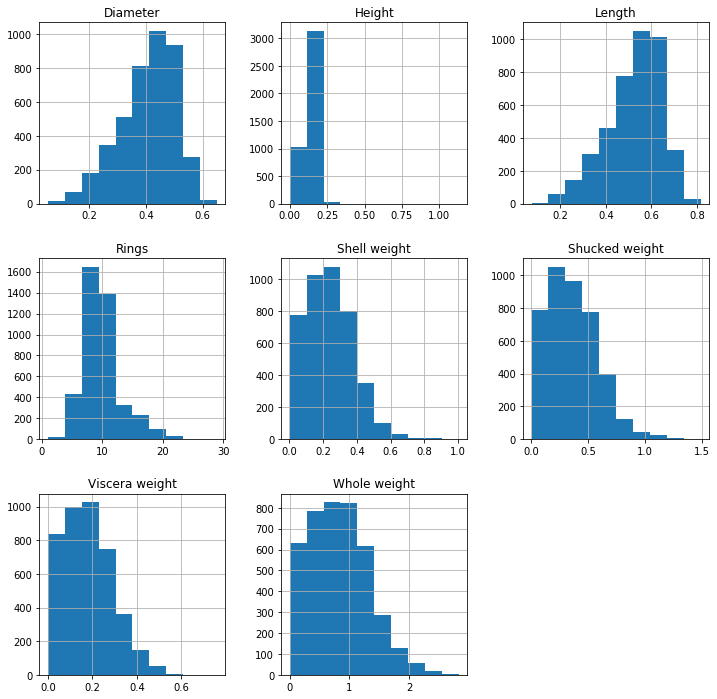

In [9]:
df.hist(figsize=(12,12))

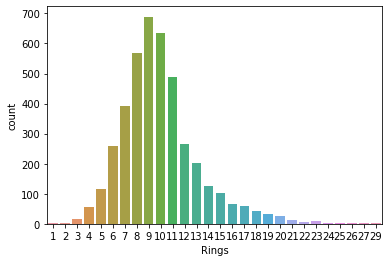

In [10]:
sns.countplot("Rings",data=df)

In [11]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

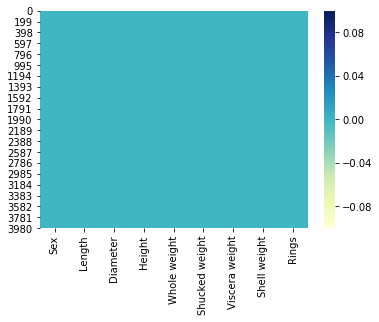

In [12]:
sns.heatmap(df.isna(),cmap="YlGnBu")

In [14]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


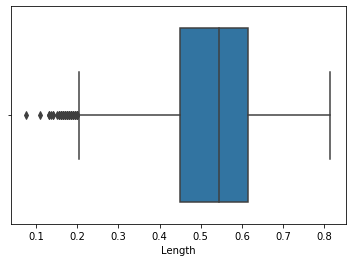

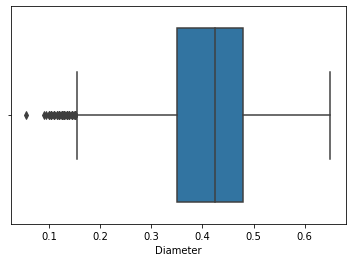

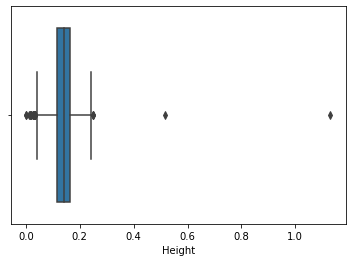

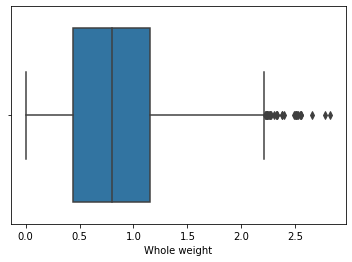

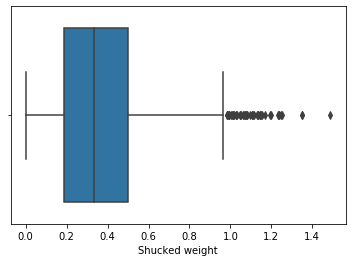

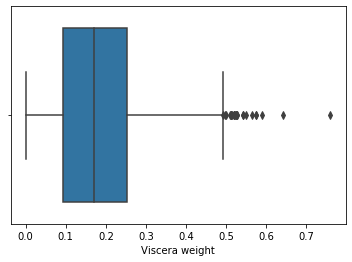

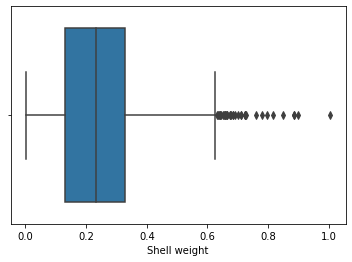

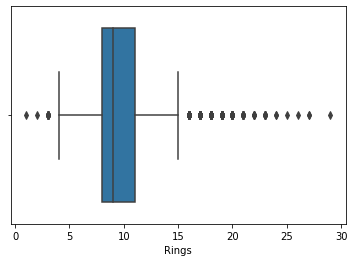

In [20]:
for i in df.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(df[i])
    plt.show()

In [28]:
df=pd.concat([df,pd.get_dummies(df.Sex,drop_first=True,prefix="Sex")],axis=1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0


In [29]:
y=df['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [32]:
df.drop('Sex',axis=1,inplace=True)

In [34]:
x=df.drop('Rings',axis=1)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,0


documentation link:https://docs.google.com/document/d/1SgSkpA-xoTAC9DPRRHQOVlpFD1LiNYCawvt_Qxtq5Ag/edit?usp=sharing